# Tasca M6 T01

In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import random
#import math
#from math import sqrt

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

#Modelos de regresion
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

#Preprocesamiento
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

## Exercici 1
### Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.

El dataset consta con información de los suburbios de Boston.

El data set no incluye cabecera con el nombre de las columnas. Encontramos los atributos en el archivo adjunto del ejercicio, donde también se encuentra la descripción de cada una de las columnas. [housing data description.txt](https://github.com/Huanhotze/Sprint-6.-Algoritmes-daprenentatge-supervisat-Regressio/blob/main/M6%20DATA/housing%20data%20description.txt)

In [3]:
#https://github.com/Huanhotze/Sprint-6.-Algoritmes-daprenentatge-supervisat-Regressio/blob/main/M6%20DATA/housing%20data.csv
url = 'https://raw.githubusercontent.com/Huanhotze/Sprint-6.-Algoritmes-daprenentatge-supervisat-Regressio/main/M6%20DATA/housing%20data.csv'

df = pd.read_csv(url, header=None)
df.columns = ["CRIM","ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B_1000", "LSTAT", "MEDV"]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B_1000,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


#### Analisis de la base de datos para su compresión.



In [4]:
df.shape

(506, 14)

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B_1000   506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
df.isnull().values.any()

False

In [8]:
df.isna().values.any()

False

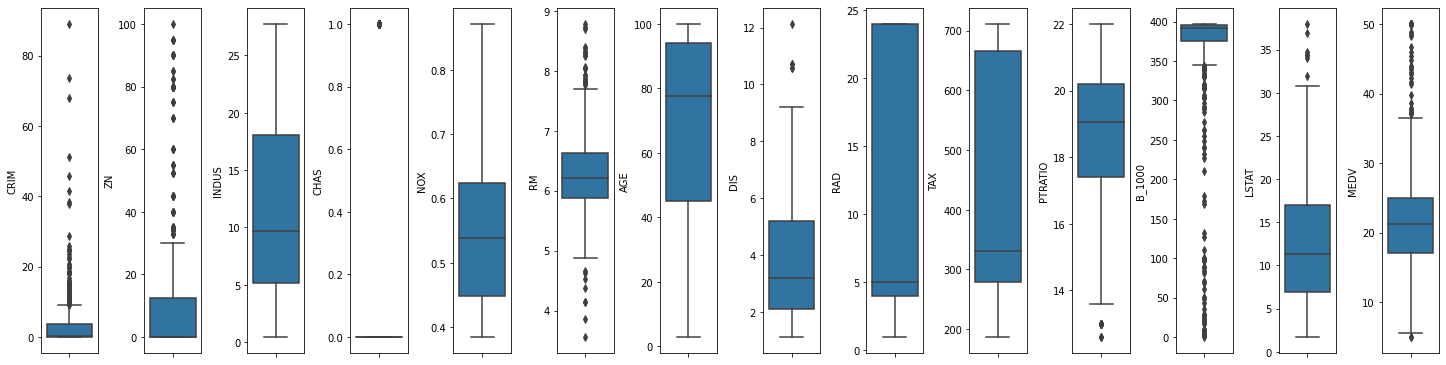

In [9]:
fig, axs = plt.subplots(ncols=14, nrows=1, figsize=(20, 5))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

#### Preprocesado

Previo a separar el dataset en Train/Test preprocesaremos los datos para  aumentar la precisión y la eficacia de un modelo de aprendizaje automático.

Como podemos apreciar en las gráficas boxplot, hemos encontrado Features con muchos Outlayers, para los que utilizaremos [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html). Este escalador elimina la mediana y escala los datos según el rango de cuantiles.

Con la feature 'CHAS' no haremos nada ya que es binaria.

Para el resto utilizaremos una normalización con [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html?highlight=minmaxscaler#sklearn.preprocessing.MinMaxScaler) de manera que pase los valores a un rango entre 0 y 1.

* ROBUSTSCALER ['CRIM', 'ZN', 'RM', 'B_1000', 'LSTAT']
* MINMAXSCALER ['INDUS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO']


In [10]:
columnsNorm = ['INDUS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO']
scaler = MinMaxScaler().fit(df[columnsNorm])
df[columnsNorm] = scaler.transform(df[columnsNorm])

columnsRobust =  ['CRIM', 'ZN', 'RM', 'B_1000', 'LSTAT']
scaler = RobustScaler().fit(df[columnsRobust])
df[columnsRobust] = scaler.transform(df[columnsRobust])

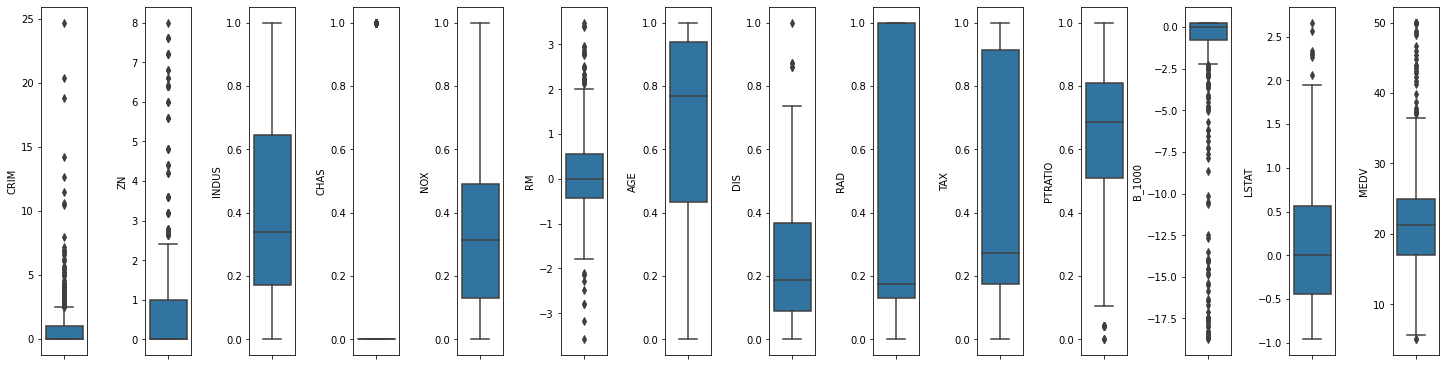

In [11]:
fig, axs = plt.subplots(ncols=14, nrows=1, figsize=(20, 5))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

#### Test/Train


In [12]:
X = df.drop(['MEDV'], axis=1)
y = df['MEDV']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

#### 1 Modelo de regresión: LinearRegression

[sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linearregression#sklearn.linear_model.LinearRegression)

Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

In [13]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred_lr = lr.predict(X_test)

#### 2 Modelo de regresión: Support Vector Regression

[sklearn.svm.SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html?highlight=svr#sklearn.svm.SVR)

Epsilon-Support Vector Regression.

The free parameters in the model are C and epsilon.

The implementation is based on libsvm. The fit time complexity is more than quadratic with the number of samples which makes it hard to scale to datasets with more than a couple of 10000 samples.

In [15]:
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [16]:
y_pred_svr = svr.predict(X_test)

#### 3 Modelo de regresión: Decision Tree Regression

[sklearn.tree.DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html?highlight=decision+tree+regression)

Tree models where the target variable can take a discrete set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels

In [17]:
dt = DecisionTreeRegressor(random_state = 0)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [18]:
y_pred_dt = dt.predict(X_test)

## Exercici 2
###  Compara’ls en base al MSE i al R2.



#### MSE i al R2 - 1 Modelo de regresión: LinearRegression

In [19]:
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

r2_lr, mse_lr

(0.736986690733765, 21.442885760681964)

#### MSE i al R2 - 2 Modelo de regresión: Support Vector Regression

In [20]:
r2_svr = r2_score(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)

r2_svr, mse_svr

(0.5793641421174095, 34.29349895861244)

#### MSE i al R2 - 3 Modelo de regresión: Decision Tree Regression

In [21]:
r2_dt = r2_score(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)

r2_dt, mse_dt

(0.8098589185324716, 15.501776315789474)

#### Comparativa en base a MSE i al R2

Para hacer una comparación sencilla y visual pasaremos los datos a una tabla y posteriormente haremos un gráfico

In [22]:
models = pd.DataFrame( data = [('Linear Regression', r2_lr, mse_lr), 
                                  ('Support Vector Regression', r2_svr, mse_svr), 
                                  ('Decision Tree Regression', r2_dt, mse_dt)],
                         columns = ['Model', 'R2', 'MSE'])

models

,Model,R2,MSE
0,Linear Regression,0.736987,21.442886
1,Support Vector Regression,0.579364,34.293499
2,Decision Tree Regression,0.809859,15.501776


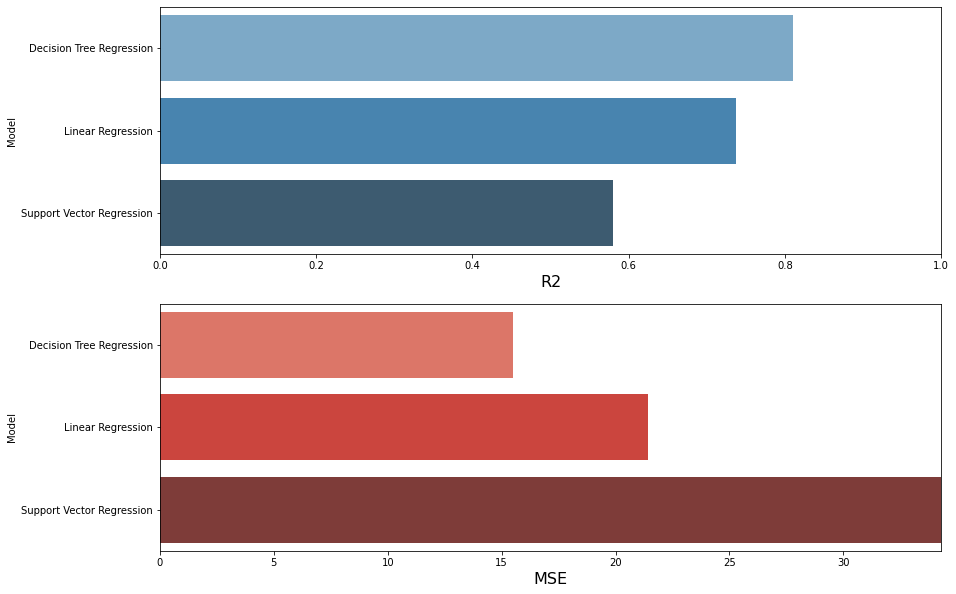

In [23]:
f, axes = plt.subplots(2,1, figsize=(14,10))

models.sort_values(by=['R2'], ascending=False, inplace=True)

sns.barplot(x='R2', y='Model', data = models, palette='Blues_d', ax = axes[0])

axes[0].set_xlabel('R2', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)

models.sort_values(by=['MSE'], ascending=True, inplace=True)

sns.barplot(x='MSE', y='Model', data = models, palette='Reds_d', ax = axes[1])

axes[1].set_xlabel('MSE', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,models.MSE.max())

plt.show()

Tanto basandonos en R2 como en MSE, el modelo entrenado con "Tree Regression" es superior a los otros dos. 



*   En caso de R2 cuanto más cercano a 1 más preciso es el modelo.
*   En caso de MSE cuanto más cercano a 0 mejor es el modelo en su predicción. 



## Exercici 3
### Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.





#### 1 Modelo de regresión: LinearRegression

Después de probar diferentes parametros, ninguno supera al modelo entrenado originariamente.

Incluyendo el parametro positive=True, parece el menos malo.

In [24]:
lr = LinearRegression(positive=True)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
r2_lr2 = r2_score(y_test, y_pred_lr)
mse_lr2 = mean_squared_error(y_test, y_pred_lr)

r2_lr, r2_lr2, mse_lr, mse_lr2

(0.736986690733765, 0.5948840353264961, 21.442885760681964, 33.02819684128284)

In [25]:
lr_comp = pd.DataFrame( data = [('Linear Regression Original', r2_lr, mse_lr), 
                                  ('Linear Regression Parametros', r2_lr2, mse_lr2),],
                         columns = ['Model', 'R2', 'MSE'])
lr_comp

,Model,R2,MSE
0,Linear Regression Original,0.736987,21.442886
1,Linear Regression Parametros,0.594884,33.028197


#### 2 Modelo de regresión: Support Vector Regression

Incluyendo los parametros C=15.0, epsilon=0.1, conseguimos mejorar el modelo original significativamente.

In [26]:
svr = SVR(C=15.0, epsilon=0.1)
svr.fit(X_train, y_train)

y_pred_svr = svr.predict(X_test)

r2_svr2 = r2_score(y_test, y_pred_svr)
mse_svr2 = mean_squared_error(y_test, y_pred_svr)

r2_svr, r2_svr2, mse_svr, mse_svr2

(0.5793641421174095, 0.8170073239618811, 34.29349895861244, 14.918982838830065)

In [27]:
svr_comp = pd.DataFrame( data = [('Support Vector Regression Original', r2_svr, mse_svr), 
                                  ('Support Vector Regression Parametros', r2_svr2, mse_svr2)],
                         columns = ['Model', 'R2', 'MSE'])
svr_comp

,Model,R2,MSE
0,Support Vector Regression Original,0.579364,34.293499
1,Support Vector Regression Parametros,0.817007,14.918983


#### 3 Modelo de regresión: Decision Tree Regression

Añadiendo el parametro max_leaf_nodes = 12, conseguimos mejorar el modelo.

In [28]:
dt = DecisionTreeRegressor(random_state = 0, max_leaf_nodes = 12)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

r2_dt2 = r2_score(y_test, y_pred_dt)
mse_dt2 = mean_squared_error(y_test, y_pred_dt)

r2_dt, r2_dt2, mse_dt, mse_dt2

(0.8098589185324716,
 0.8078731856787712,
 15.501776315789474,
 15.663668665845526)

In [29]:
dt_comp = pd.DataFrame( data = [('Decision Tree Regression Original', r2_dt, mse_dt),
                                ('Decision Tree Regression Parametros', r2_dt2, mse_dt2),],
                         columns = ['Model', 'R2', 'MSE'])
dt_comp

,Model,R2,MSE
0,Decision Tree Regression Original,0.809859,15.501776
1,Decision Tree Regression Parametros,0.807873,15.663669


Veamos visualmente cual es el mejor modelo de  los entreados hasta el momento:

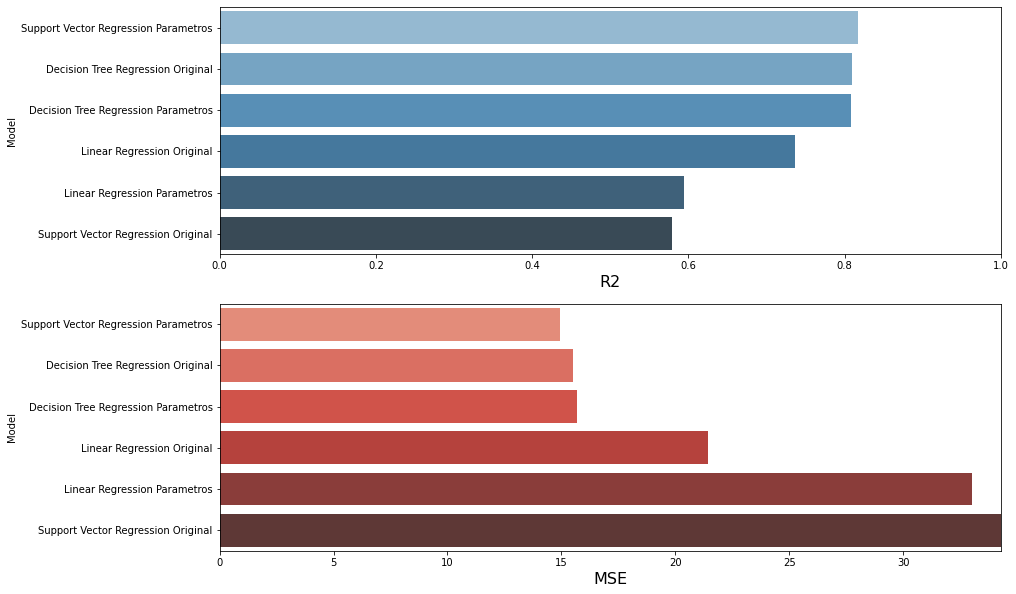

In [30]:
models = pd.DataFrame( data = [('Linear Regression Original', r2_lr, mse_lr), 
                             ('Linear Regression Parametros', r2_lr2, mse_lr2),
                             ('Support Vector Regression Original', r2_svr, mse_svr), 
                             ('Support Vector Regression Parametros', r2_svr2, mse_svr2),
                             ('Decision Tree Regression Original', r2_dt, mse_dt),
                             ('Decision Tree Regression Parametros', r2_dt2, mse_dt2)],
                         columns = ['Model', 'R2', 'MSE'])

f, axes = plt.subplots(2,1, figsize=(14,10))

models.sort_values(by=['R2'], ascending=False, inplace=True)

sns.barplot(x='R2', y='Model', data = models, palette='Blues_d', ax = axes[0])

axes[0].set_xlabel('R2', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)

models.sort_values(by=['MSE'], ascending=True, inplace=True)

sns.barplot(x='MSE', y='Model', data = models, palette='Reds_d', ax = axes[1])

axes[1].set_xlabel('MSE', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,models.MSE.max())

plt.show()

Basado tanto en R2 como en MSE, el mejor modelo es el nuevo modelo entrenado de SVR con los parametros C=15.0, epsilon=0.1

## Exercici 4
### Compara el seu rendiment emprant l’aproximació traint/test o emprant totes les dades (validació interna).





Compararemos con Cross Validation los dos mejores modelos encontrados durante el ejercicio:



*  Support Vector Regression Parametros
*   Decision Tree Regression Parametros



In [31]:
# Predicting Cross Validation Score the Test set results
cv_dt = cross_val_score(estimator = dt, X = X_train, y = y_train, cv = 10)
cv_svr = cross_val_score(estimator = svr, X = X_train, y = y_train, cv = 10)

cv_dt.mean(), cv_svr.mean()

(0.6424223129413067, 0.7433026873458324)

In [32]:
cv_comp = pd.DataFrame( data = [('Support Vector Regression Parametros', cv_svr.mean()),
                                ('Decision Tree Regression Parametros', cv_dt.mean()),],
                         columns = ['Model', 'CV'])
cv_comp

,Model,CV
0,Support Vector Regression Parametros,0.743303
1,Decision Tree Regression Parametros,0.642422


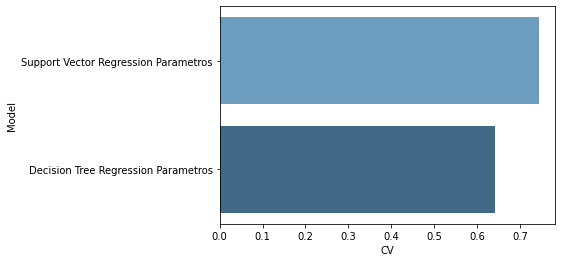

In [33]:
sns.barplot(
    data=cv_comp, x='CV', y='Model', capsize=.4, errcolor=".5",
    linewidth=3, palette='Blues_d')

Nuevamente, el mejor modelo es el nuevo modelo entrenado de SVR con los parametros C=15.0, epsilon=0.1 al igual que nos indicaban tanto R2 como MSE. 

## Exercici 5
### No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions.





Primero eliminaremos la feature "RM" directamente de la variable X.
Luego aplicaremos los dos mejores modelos encontrados durante el ejercicio:



*  Support Vector Regression Parametros
*   Decision Tree Regression Parametros

In [36]:
XsinRM = X.drop(['RM'], axis=1)
XsinRM.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B_1000', 'LSTAT'],
      dtype='object')

In [37]:
X_train, X_test, y_train, y_test = train_test_split(XsinRM, y, test_size = 0.3)

In [38]:
svr = SVR(C=15.0, epsilon=0.1)
svr.fit(X_train, y_train)

y_pred_svr = svr.predict(X_test)

r2_svr_sinRM = r2_score(y_test, y_pred_svr)
mse_svr_sinRM = mean_squared_error(y_test, y_pred_svr)

r2_svr_sinRM, mse_svr_sinRM

(0.6362374267349649, 29.028492034249368)

In [39]:
dt = DecisionTreeRegressor(random_state = 0, max_leaf_nodes = 12)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

r2_dt_sinRM = r2_score(y_test, y_pred_dt)
mse_dt_sinRM = mean_squared_error(y_test, y_pred_dt)

r2_dt_sinRM, mse_dt_sinRM

(0.7269877049308626, 21.786560287202466)

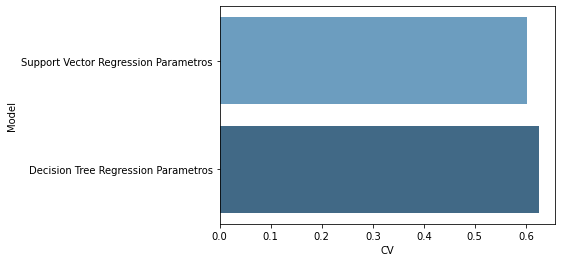

In [41]:
# Predicting Cross Validation Score the Test set results
cv_dt = cross_val_score(estimator = dt, X = X_train, y = y_train, cv = 10)
cv_svr = cross_val_score(estimator = svr, X = X_train, y = y_train, cv = 10)

cv_dt.mean(), cv_svr.mean()

cv_comp = pd.DataFrame( data = [('Support Vector Regression Parametros', cv_svr.mean()),
                                ('Decision Tree Regression Parametros', cv_dt.mean()),],
                         columns = ['Model', 'CV'])
cv_comp

sns.barplot(
    data=cv_comp, x='CV', y='Model', capsize=.4, errcolor=".5",
    linewidth=3, palette='Blues_d')

Una vez eliminada la feature "RM" vemos que las predicciones de los dos modelos que anteriormente habían sido los mejores bajan sustacialmente.

Con estos resultados podemos concluir que en el caso de este dataframe, el número de habitaciones es muy relevante a la hora de valorar una vivienda en Boston, por lo tanto es una feature importante si queremos hacer predicciones sobre el precio de una vivienda en Boston. 